| Attribute | Description |
|-----------|-------------|
| X1        | Cost of Interest-bearing Debt |
| X2        | Cash Reinvestment Ratio |
| X3        | Current Ratio |
| X4        | Acid Test |
| X5        | Interest Expenses/Total Revenue |
| X6        | Total Liability/Equity Ratio |
| X7        | Liability/Total Assets |
| X8        | Interest-bearing Debt/Equity |
| X9        | Contingent Liability/Equity |
| X10       | Operating Income/Capital |
| X11       | Pretax Income/Capital |
| X12       | Working Capital to Total Assets |
| X13       | Quick Assets/Total assets |
| X14       | Current Assets/Total Assets |
| X15       | Cash/Total Assets |
| X16       | Quick Assets/Current Liability |
| X17       | Cash/Current Liability |
| X18       | Current Liability to Assets |
| X19       | Operating Funds to Liability |
| X20       | Inventory/Working Capital |
| X21       | Inventory/Current Liability |
| X22       | Current Liabilities/Liability |
| X23       | Working Capital/Equity |
| X24       | Current Liabilities/Equity |
| X25       | Long-term Liability to Current Assets |
| X26       | Current Liability to Current Assets |
| X27       | One if Total Liability exceeds Total Assets; |
| X28       | Equity to Liability |
| X29       | Equity/Total Assets |
| X30       | (Long-term Liability+Equity)/Fixed Assets |
| X31       | Fixed Assets to Assets |
| X32       | Current Liability to Liability |
| X33       | Current Liability to Equity |
| X34       | Equity to Long-term Liability |
| X35       | Liability to Equity |
| X36       | Degree of Financial Leverage |
| X37       | Interest Coverage Ratio |
| X38       | Operating Expenses/Net Sales |
| X39       | (Research and Development Expenses)/Net Sales |
| X40       | Effective Tax Rate |
| X41       | Book Value Per Share(B) |
| X42       | Book Value Per Share(A) |
| X43       | Book Value Per Share(C) |
| X44       | Cash Flow Per Share |
| X45       | Sales Per Share |
| X46       | Operating Income Per Share |
| X47       | Sales Per Employee |
| X48       | Operation Income Per Employee |
| X49       | Fixed Assets Per Employee |
| X50       | total assets to GNP price |
| X51       | Return On Total Assets(C) |
| X52       | Return On Total Assets(A) |
| X53       | Return On Total Assets(B) |
| X54       | Gross Profit /Net Sales |
| X55       | Realized Gross Profit/Net Sales |
| X56       | Operating Income /Net Sales |
| X57       | Pre-Tax Income/Net Sales |
| X58       | Net Income/Net Sales |
| X59       | Net Non-operating Income Ratio |
| X60       | Net Income-Exclude Disposal Gain or Loss/Net Sales |
| X61       | EPS-Net Income |
| X62       | Pretax Income Per Share |
| X63       | Retained Earnings to Total Assets |
| X64       | Total Income to Total Expenses |
| X65       | Total Expenses to Assets |
| X66       | Net Income to Total Assets |
| X67       | Gross Profit to Sales |
| X68       | Net Income to Stockholder's Equity |
| X69       | One if Net Income is Negative for the Last Two Years; Zero Otherwise |
| X70       | (Inventory +Accounts Receivables) /Equity |
| X71       | Total Asset Turnover |
| X72       | Accounts Receivable Turnover |
| X73       | Days Receivable Outstanding |
| X74       | Inventory Turnover |
| X75       | Fixed Asset Turnover |
| X76       | Equity Turnover |
| X77       | Current Assets to Sales |
| X78       | Quick Assets to Sales |
| X79       | Working Capital to Sales |
| X80       | Cash to Sales |
| X81       | Cash Flow to Sales |
| X82       | No-credit Interval |
| X83       | Cash Flow from Operating/Current Liabilities |
| X84       | Cash Flow to Total Assets |
| X85       | Cash Flow to Liability |
| X86       | CFO to Assets |
| X87       | Cash Flow to Equity |
| X88       | Realized Gross Profit Growth Rate |
| X89       | Operating Income Growth |
| X90       | Net Income Growth |
| X91       | Continuing Operating Income after Tax Growth |
| X92       | Net Income-Excluding Disposal Gain or Loss Growth |
| X93       | Total Asset Growth |
| X94       | Total Equity Growth |
| X95       | Return on Total Asset Growth |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from holoviews.plotting.bokeh.styles import font_size 
import numpy as np
from bankruptcy_prediction.dataset_methods import extract_significant_correlations, remove_outliers
from bankruptcy_prediction.dataset_methods import load_data

In [2]:
path = '../data/raw/dataset.csv'
df = load_data(path)

In [3]:
#There is no missing values
len_before = len(df)
df_cleaned = df.dropna()
len_after = len(df_cleaned)
print(f"Rows before cleaning: {len_before}")
print(f"Rows after cleaning: {len_after}")

Rows before cleaning: 6819
Rows after cleaning: 6819


In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
labels = ["Bankrupt"] + [f"X{i}" for i in range(1, 96)]
print(labels)
df.columns = labels 

['Bankrupt', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95']


In [6]:
df.describe()

,Bankrupt,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
# X94 have the same value for all rows
tolerance = 0.01
l = df.loc[:, ((df.min() - df.max()).abs()) <= tolerance].columns
print(l)

Index(['X94'], dtype='object')


In [8]:
# Reshape the DataFrame to a single column
reshaped_df = df.values.reshape(-1, 1)
# Count the number of zeros
num_zeros = (reshaped_df == 0).sum()
print(f"Total Values: {len(reshaped_df)}")
print(f"Number of zeros: {num_zeros}")

Total Values: 654624
Number of zeros: 21215


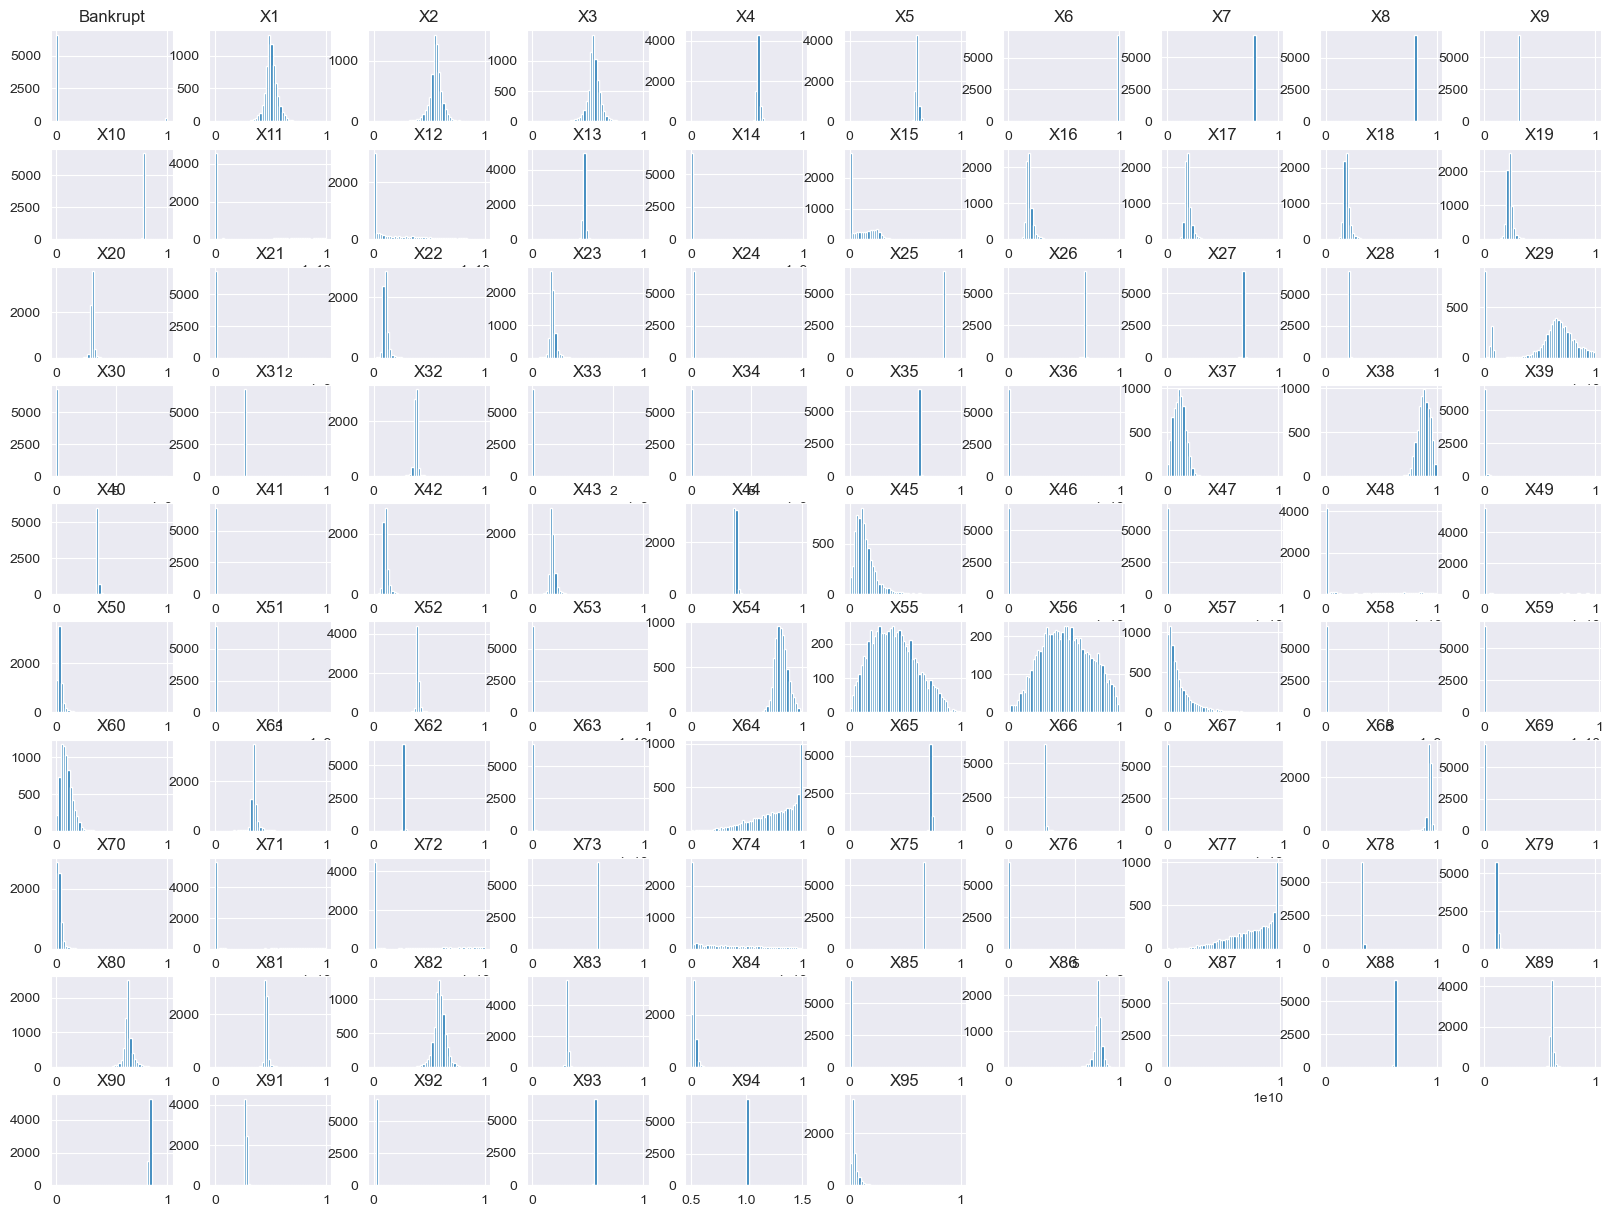

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

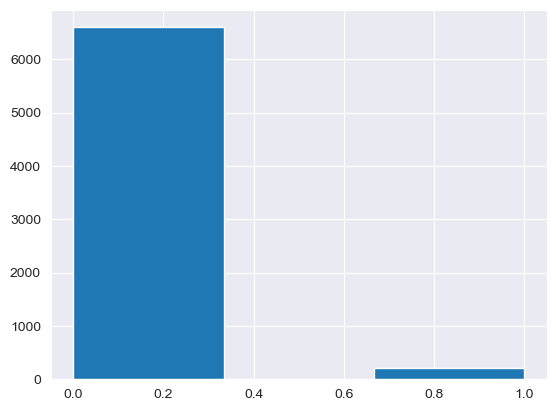

In [10]:
df['Bankrupt'].hist(bins=3)
plt.show()



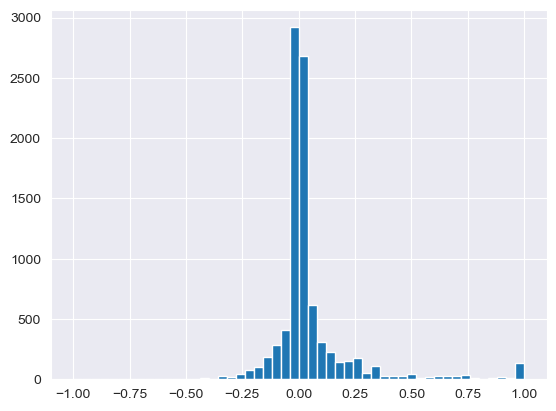

In [11]:
corr_matrix = df.corr()
corr_matrix_1d = corr_matrix.to_numpy().reshape(-1)
plt.hist(corr_matrix_1d, bins=50)
plt.show()

<Axes: >

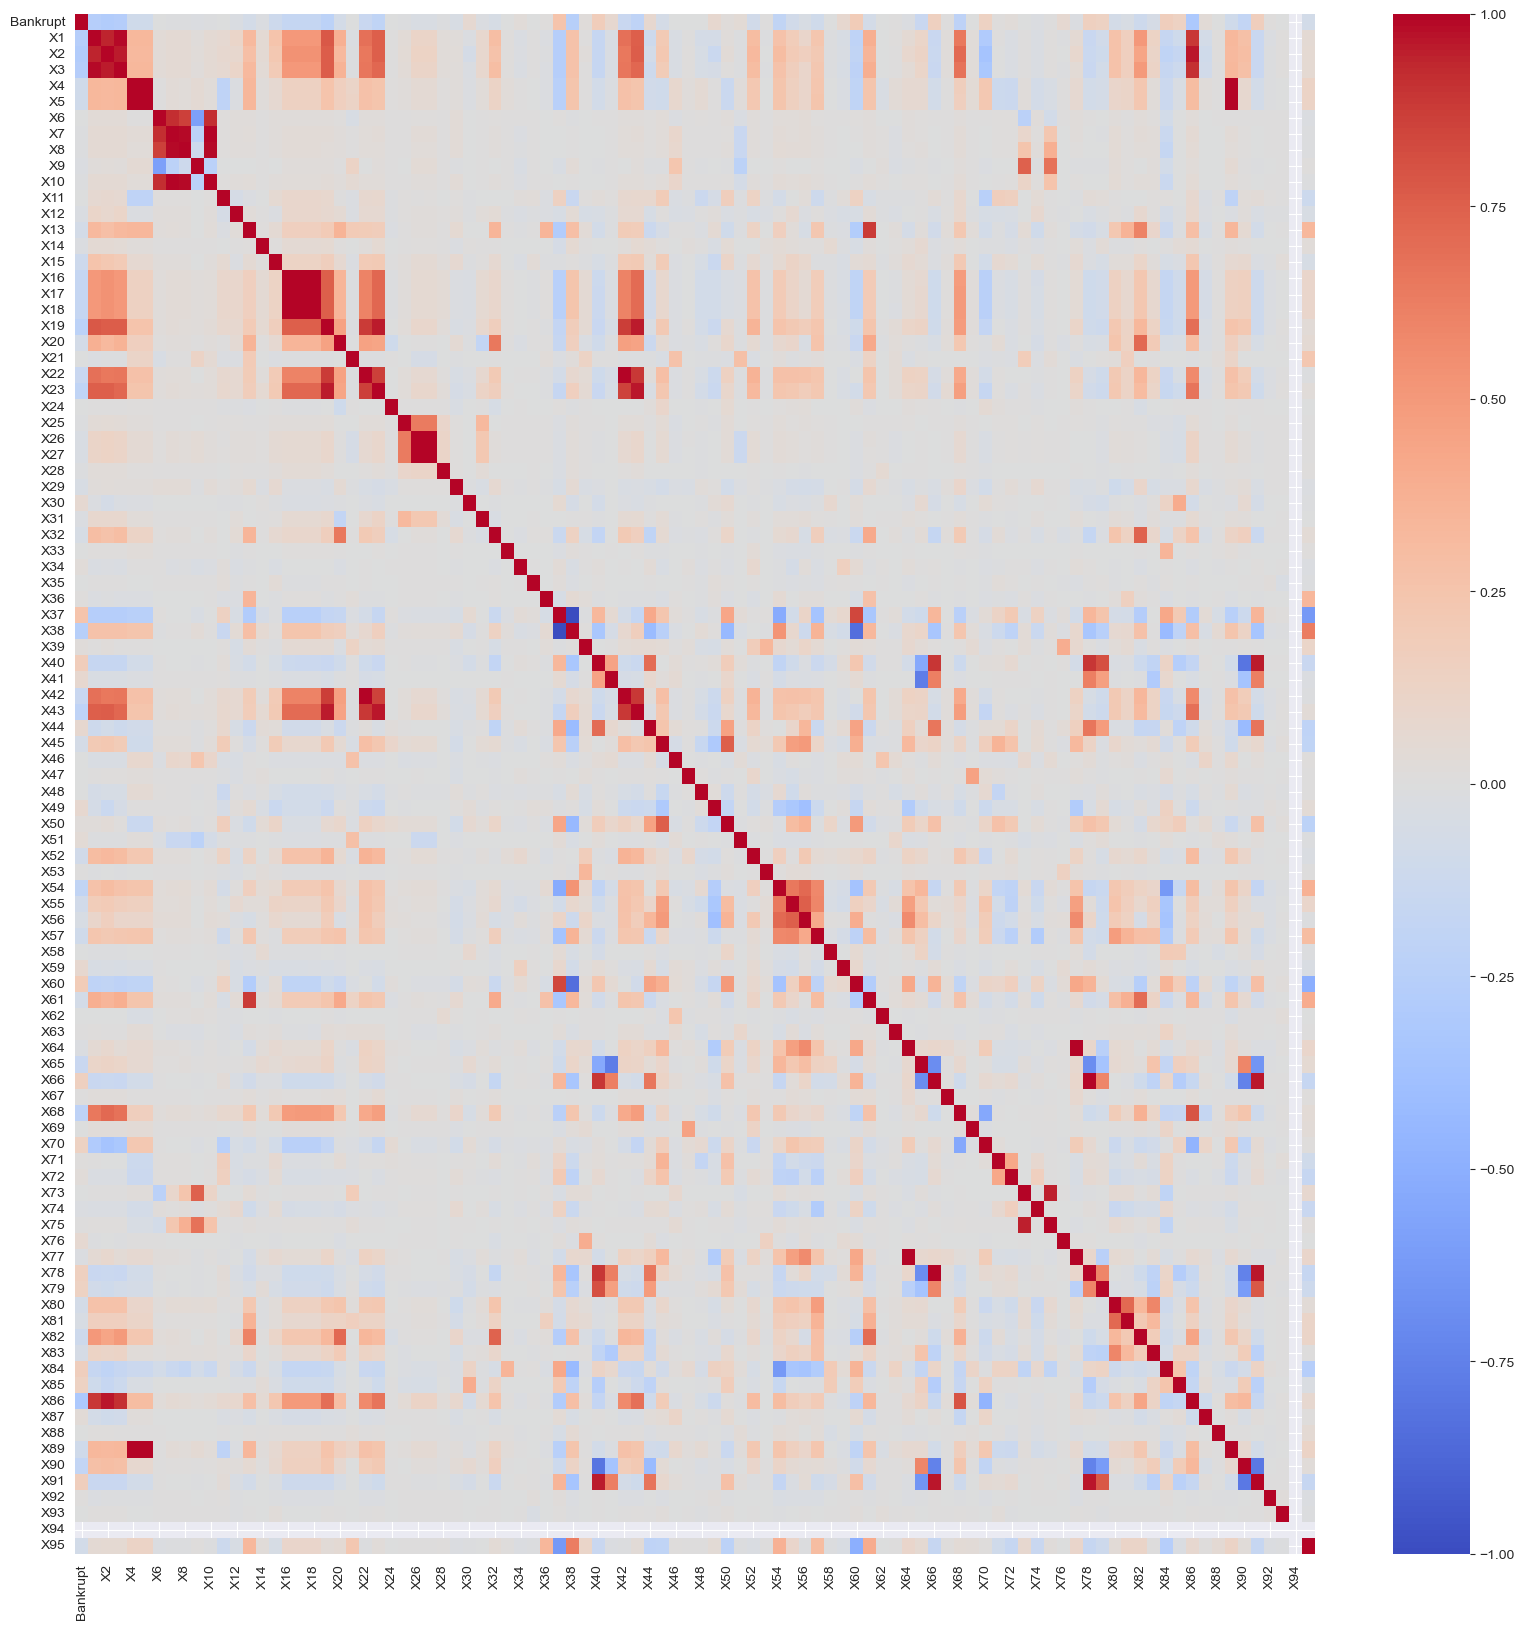

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False,cmap='coolwarm')

In [13]:
# List of pairs with correlation above 0.25
corr_pairs_df = extract_significant_correlations(corr_matrix, threshold=0.35)
corr_pairs_df

,Variable 1,Variable 2,Correlation
0,X1,X2,0.940124
1,X1,X3,0.986849
2,X1,X16,0.505580
3,X1,X17,0.505407
4,X1,X18,0.505281
...,...,...,...
182,X78,X91,0.963908
183,X79,X91,0.778135
184,X80,X81,0.712655
185,X80,X83,0.589998


In [14]:
to_remove_unique = corr_pairs_df['Variable 2'].unique()
print(f"Unique Features:{unique},\ntotal:{len(unique)}")

NameError: name 'unique' is not defined

In [114]:
new_columns = df.columns.drop(to_remove_unique)

array([[<Axes: title={'center': 'Bankrupt'}>,
        <Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>],
       [<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>, <Axes: title={'center': 'X21'}>,
        <Axes: title={'center': 'X24'}>, <Axes: title={'center': 'X25'}>,
        <Axes: title={'center': 'X28'}>],
       [<Axes: title={'center': 'X29'}>, <Axes: title={'center': 'X30'}>,
        <Axes: title={'center': 'X31'}>, <Axes: title={'center': 'X33'}>,
        <Axes: title={'center': 'X34'}>, <Axes: title={'center': 'X35'}>,
        <Axes: title={'center': 'X36'}>],
       [<Axes: title={'center': 'X37'}>, <Axes: title={'center': 'X38'}>,
        <Axes: title={'center': 'X39'}>, <Axes: title={'center': 'X40'}>,
        <Axes: title={'center': 'X45'}>, <Axes: title={'cen

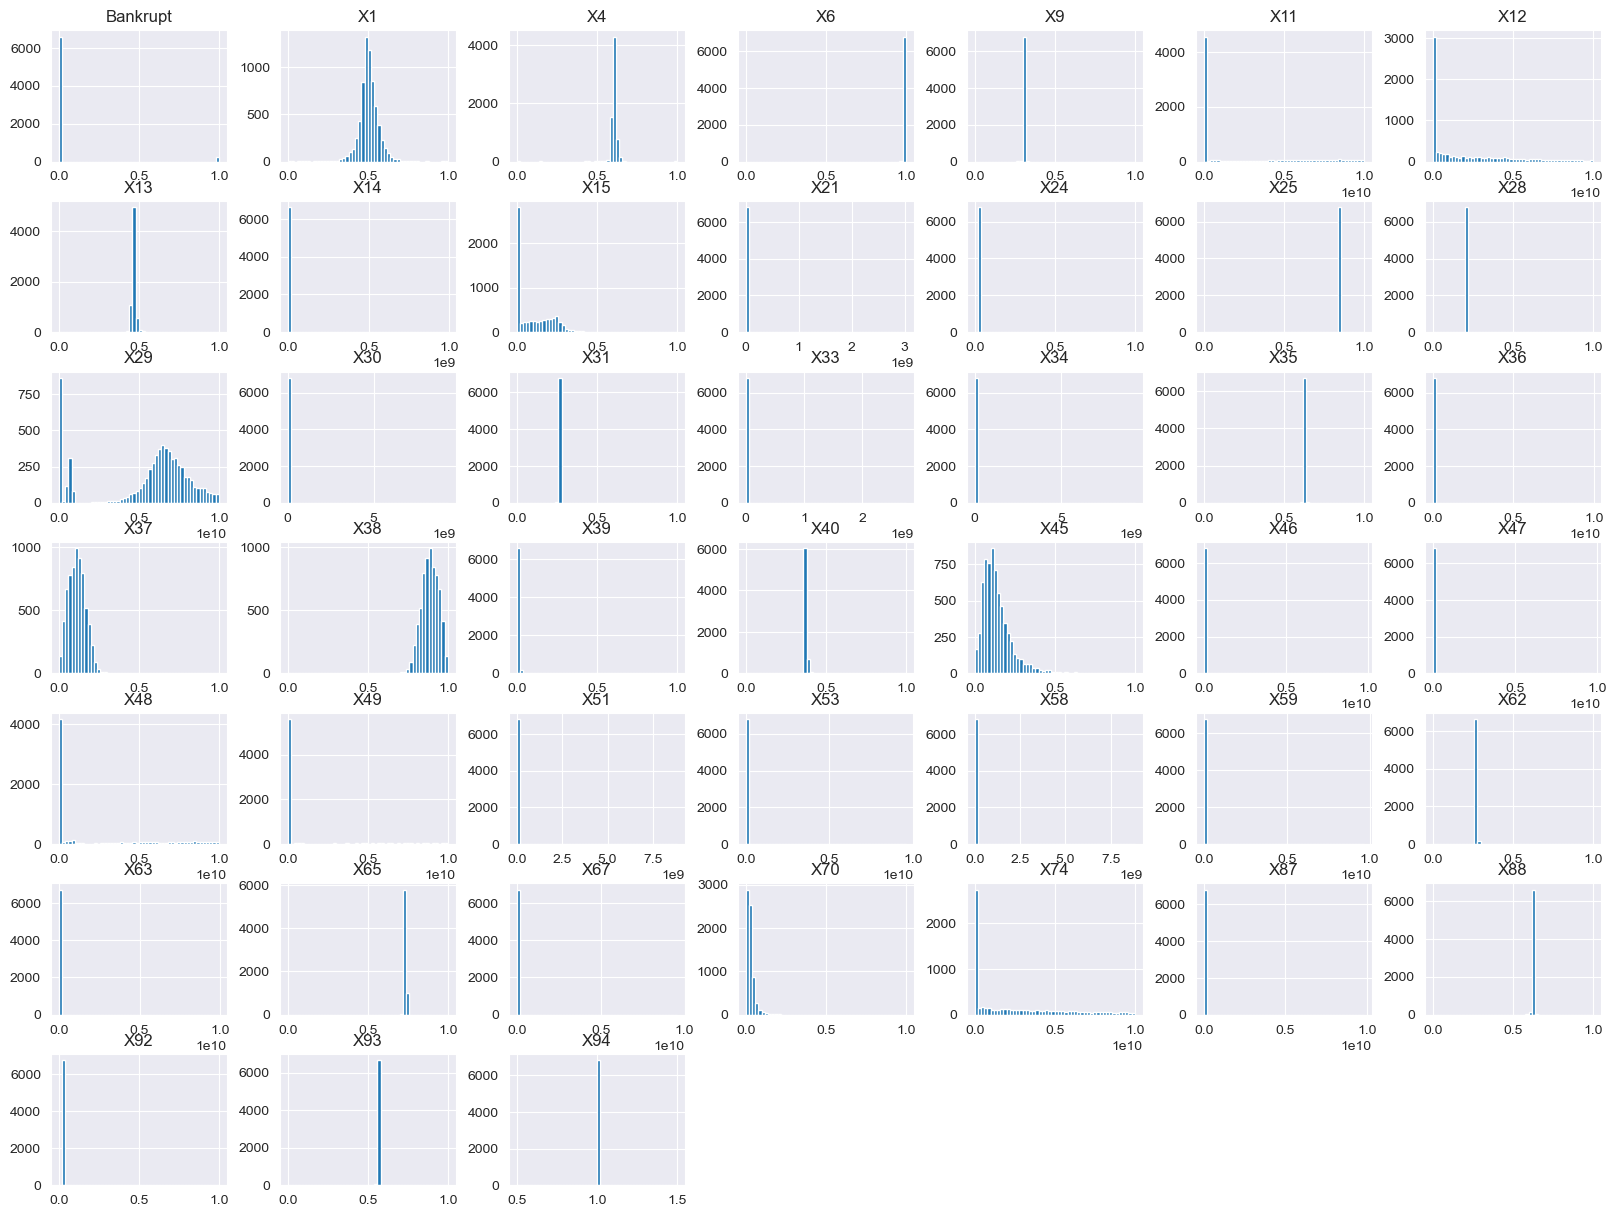

In [115]:
df[new_columns].hist(bins=50, figsize=(20, 15))

In [116]:
df_without_outliers = remove_outliers(df[new_columns],['X1','X37','X38','X45','X70','X65'])
df_without_outliers.describe()

,Bankrupt,X1,X4,X6,X9,X11,X12,X13,X14,X15,...,X63,X65,X67,X70,X74,X87,X88,X92,X93,X94
count,5656.000000,5656.000000,5656.000000,5656.000000,5656.000000,5.656000e+03,5.656000e+03,5656.000000,5.656000e+03,5656.000000,...,5.656000e+03,5656.000000,5.656000e+03,5656.000000,5.656000e+03,5.656000e+03,5656.000000,5656.000000,5656.000000,5656.0
mean,0.020863,0.506477,0.607461,0.998809,0.303744,2.039872e+09,2.060338e+09,0.467800,1.579809e+07,0.117713,...,4.803352e+07,0.735864,5.854250e+07,0.023572,2.528471e+09,3.212518e+06,0.623956,0.027627,0.565294,1.0
std,0.142938,0.042991,0.015792,0.013312,0.011500,3.304620e+09,2.623795e+09,0.017016,1.056999e+08,0.138674,...,5.415280e+08,0.003202,6.010086e+08,0.013192,2.983665e+09,1.709195e+08,0.013342,0.017061,0.014222,0.0
min,0.000000,0.388047,0.000000,0.000000,0.062507,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.726675,0.000000e+00,0.000000,0.000000e+00,1.068158e-04,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.479355,0.600908,0.998975,0.303473,1.507611e-04,1.315837e-04,0.461876,2.090209e-04,0.000000,...,3.258725e-03,0.733581,0.000000e+00,0.013604,2.539164e-04,9.987180e-04,0.623622,0.026791,0.565158,1.0
50%,0.000000,0.503217,0.606048,0.999027,0.303529,2.441086e-04,6.960000e+08,0.465323,3.200320e-04,0.082599,...,6.562756e-03,0.735793,2.394520e-03,0.020833,1.135000e+09,2.269369e-03,0.623893,0.026816,0.565285,1.0
75%,0.000000,0.533040,0.613010,0.999096,0.303597,4.380000e+09,3.650000e+09,0.471022,5.250525e-04,0.204904,...,1.109862e-02,0.738056,9.658403e-03,0.031162,4.650000e+09,5.675085e-03,0.624201,0.026927,0.565778,1.0
max,1.000000,0.623653,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,...,9.910000e+09,0.744784,9.540000e+09,0.062617,1.000000e+10,9.390000e+09,1.000000,1.000000,1.000000,1.0


array([[<Axes: title={'center': 'Bankrupt'}>,
        <Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>],
       [<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>, <Axes: title={'center': 'X21'}>,
        <Axes: title={'center': 'X24'}>, <Axes: title={'center': 'X25'}>,
        <Axes: title={'center': 'X28'}>],
       [<Axes: title={'center': 'X29'}>, <Axes: title={'center': 'X30'}>,
        <Axes: title={'center': 'X31'}>, <Axes: title={'center': 'X33'}>,
        <Axes: title={'center': 'X34'}>, <Axes: title={'center': 'X35'}>,
        <Axes: title={'center': 'X36'}>],
       [<Axes: title={'center': 'X37'}>, <Axes: title={'center': 'X38'}>,
        <Axes: title={'center': 'X39'}>, <Axes: title={'center': 'X40'}>,
        <Axes: title={'center': 'X45'}>, <Axes: title={'cen

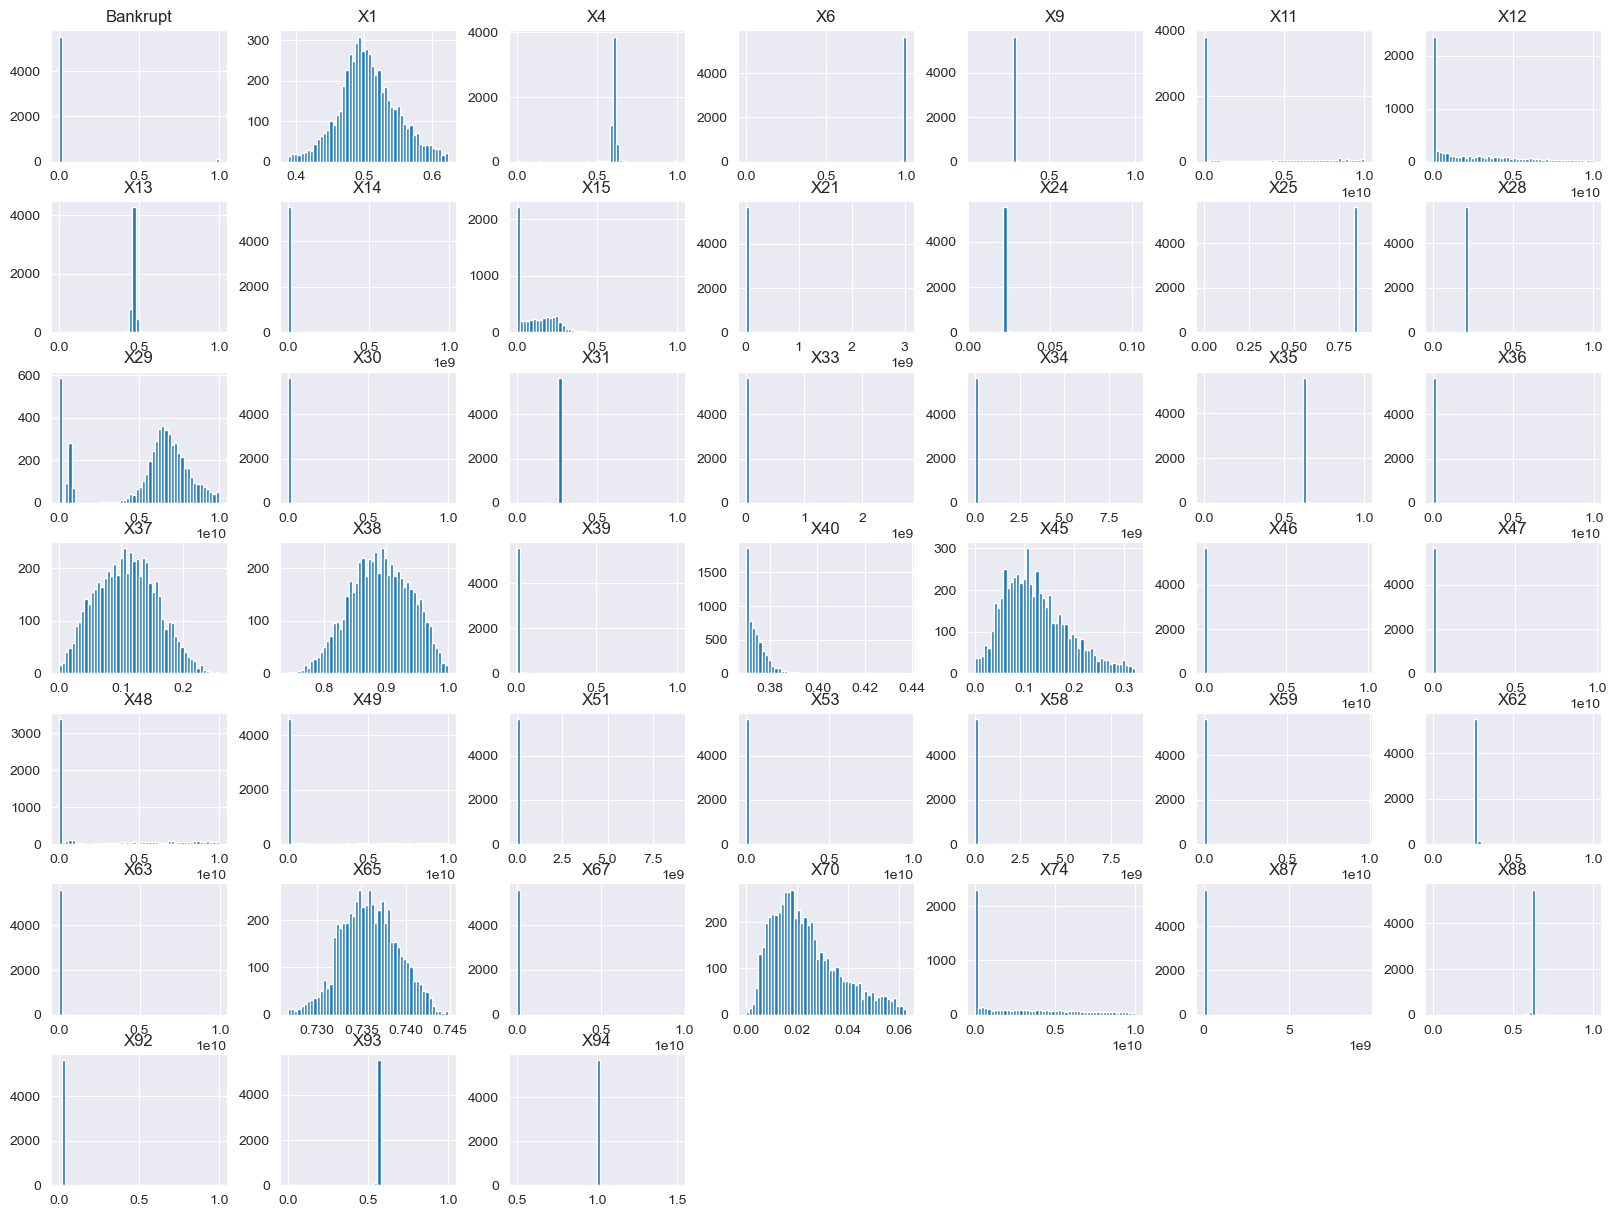

In [117]:
df_without_outliers.hist(bins=50, figsize=(20, 15))

Index(['Bankrupt', 'X1', 'X4', 'X6', 'X9', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X21', 'X24', 'X25', 'X28', 'X29', 'X30', 'X31', 'X33', 'X34', 'X35',
       'X36', 'X37', 'X38', 'X39', 'X40', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X51', 'X53', 'X58', 'X59', 'X62', 'X63', 'X65', 'X67', 'X70', 'X74',
       'X87', 'X88', 'X92', 'X93', 'X94'],
      dtype='object')
[LightGBM] [Info] Number of positive: 89, number of negative: 4435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10915
[LightGBM] [Info] Number of data points in the train set: 4524, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.019673 -> initscore=-3.908647
[LightGBM] [Info] Start training from score -3.908647
Accuracy: 0.9734982332155477
Confusion Matrix:
[[1098    5]
 [  25    4]

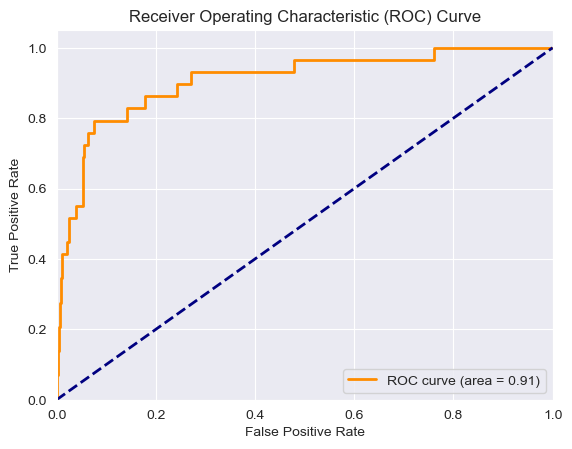

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = df_without_outliers.drop(columns='Bankrupt')
print(df_without_outliers.columns)
y = df_without_outliers['Bankrupt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = LGBMClassifier(random_state=42)
# model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()